#                                                     Bitcoin Model Processed Data
Examing Bitcoin over the last 5 years starting from the first few bitcoins that emerged. More specifically, analysis will examine prospects in the development of bitcoin predictive models. Major trends and patterns can be determined in such a fluctuating currency by looking major events that resulted in rapid increase of decrease of the bitcoin value. This model will be compared and contrasted to a sentiment analysis algorithim. 

In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import datetime 

#### Problem Statement:

Bitcoin along with several other variations ushered in a new era of cyrptocurrency and how humans today understand the functions and socioeconomic implications of developing a new currency. Essentially, the main and intial coin, bitcoin, functions as a new and decentralized method currency exhange that is traded and protect by the block chain. Bitcoins can be either purchase by their equivalent conversion or "mined" through a series of complex computer based problems. The issue the financial capitals around the world are facing is determing whether or not Bitcoin is a fad and if it not, when is the best and most lucrative time to invest. Essentially, is it possible to predict such a dynamic and fluctuative currency that has only existed for less than half a decade?


#### Hypothesis: 

The theory that these algorithim(s) is a two aspect approach of standard currency and stock analysis techniques. the first method is a simple numerical time series examination. Essentially can the past historical data of the currency help predict some sort of model for how the coin will behave in a few years. Such a model is often is more stable forms of stock(s) that can be purchased on the New York Stock Exchange. The second model that will be implemented is edited text block analysis which will compare the sentiments developed for a particular day from online twitter, facebook, reddit, etc. sources. The theory behind testing will see that both models will prove to be much more accurate together, but the the sentiment model will be much more accurate because of the dynamic nature of the coin and its sensitivity as a currency.

# Importing & Processing Data 

In [2]:
import requests
from pandas.io.json import json_normalize
date1= '2013-09-05'
date2= '2014-09-06'
r = requests.get("https://api.coindesk.com/v1/bpi/historical/close.json?start=" + date1 + "&end=" + date2)
#df=pd.read_json("https://api.coindesk.com/v1/bpi/historical/close.json?start=" + date1 + "&end=" + date2)
b=requests.get('https://www.quandl.com/api/v3/datasets/BCHARTS/BITSTAMPUSD')
r=(r.json()) # if response type was set to JSON, then you'll automatically have a JSON response here...


#df.pivot(index='foo', columns='bar', values='baz')
A=json_normalize(b.json())#.transpose#.pivot(index='date', columns='bpi')

#df=pd.DataFrame(r.key(),index=r.values())
A



,dataset.collapse,dataset.column_index,dataset.column_names,dataset.data,dataset.database_code,dataset.database_id,dataset.dataset_code,dataset.description,dataset.end_date,dataset.frequency,...,dataset.limit,dataset.name,dataset.newest_available_date,dataset.oldest_available_date,dataset.order,dataset.premium,dataset.refreshed_at,dataset.start_date,dataset.transform,dataset.type
0,None,None,"[Date, Open, High, Low, Close, Volume (BTC), V...","[[2018-03-21, 8904.02, 9188.1, 8754.83, 8829.1...",BCHARTS,8431,BITSTAMPUSD,Daily Bitcoin exchange rate (BTC vs. USD) on B...,2018-03-21,daily,...,None,Bitcoin Markets (bitstampUSD),2018-03-21,2011-09-13,None,False,2018-03-21T23:16:44.517Z,2011-09-13,None,Time Series


,Close,Volume (BTC),Weighted Price
Date,,,
2011-09-13,5.97,58.371382,5.929231
2011-09-14,5.53,61.145984,5.590798
2011-09-15,5.13,80.140795,5.094272
2011-09-16,4.85,39.914007,4.854515
2011-09-17,4.87,0.300000,4.870000


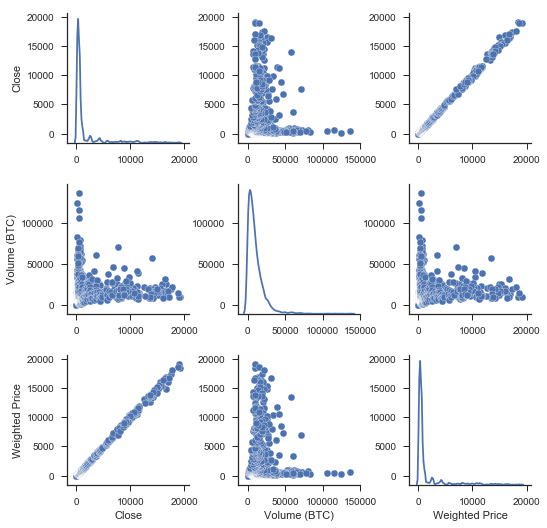

In [3]:
data= A['dataset.data'].all()
df = pd.DataFrame(data)
df.columns=A['dataset.column_names'].all()
df.index= df.Date
df=df.reindex(index=df.index[::-1])
del df['Open'],df['High'],df['Low'],df['Volume (Currency)'],df['Date']
sns.pairplot(df,diag_kind="kde")
df.head()

,Close,Volume (BTC),Weighted Price
count,2382.000000,2382.000000,2382.000000
mean,1210.200487,10169.181414,1203.113192
std,2753.203881,11387.397026,2731.305960
min,0.000000,0.000000,0.000000
25%,90.162500,3061.454274,91.010111
50%,373.700000,7150.984218,373.881631
75%,679.407500,13582.767796,674.240250
max,19187.780000,137070.178338,19110.244062


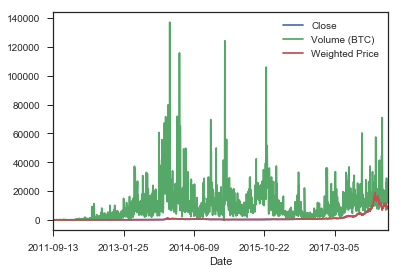

In [4]:

pd.read_csv('bit_data.csv').dropna()
#print(A)

#A['Date'] = pd.to_datetime(A['Date'], format = '%m-%d-%y')
date_range = pd.date_range(datetime.date(2010, 7, 18), datetime.date(2018, 2, 4)) #year, month, day
# df= pd.Series(A,index=date_range)
# df

#A.index=A['Date']
#del A['Date']
# date_rangex
#A['Date'] = pd.to_datetime(A['Date'], format = '%Y-%m-%d')

df.plot()
df.describe()

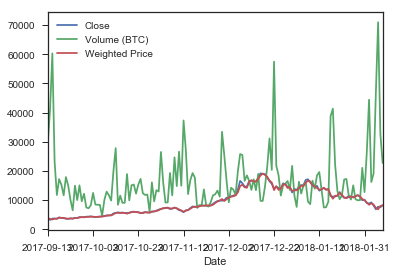

In [5]:
df['2017-09-13':'2018-02-08'].plot() #Add most reason date 

In [6]:
b=requests.get('https://api.blockchain.info/charts/total-bitcoins?timespan=all&format=json')
bitcoin_num=json_normalize(b.json())
#print(A.columns)
bitcoin_num

,description,name,period,status,unit,values
0,The total number of bitcoins that have already...,Bitcoins in circulation,day,ok,BTC,"[{'x': 1230940800, 'y': 50.0}, {'x': 123111360..."


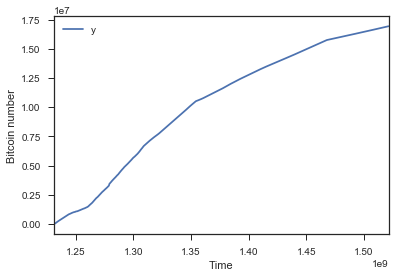

In [7]:
df2 = pd.DataFrame(bitcoin_num['values'].all())
# df.index=df[0]
# del df[0]
#df=df.reindex(index=df.index[::-1])
df2.index=df2['x']
del df2['x']
df2.plot()
plt.xlabel('Time')
plt.ylabel('Bitcoin number')
#plt.plot(df.x,df.y)
date_range = pd.date_range(datetime.date(2010, 7, 18), datetime.date(2018, 2, 4)) #year, month, day

# bit =pd.read_csv('total-bitcoins.csv')
# bit.columns=['Date', 'Number of Coins']
# bit.index=bit.Date
# del bit['Date']
# fig, ax = plt.subplots(figsize=(15,7))
# bit.plot(kind='bar',ax=ax)
# ax.xaxis.set_major_formatter(bit.index.DateFormatter('%b %d'))

Text(0,0.5,'Coin Value is USD($)')

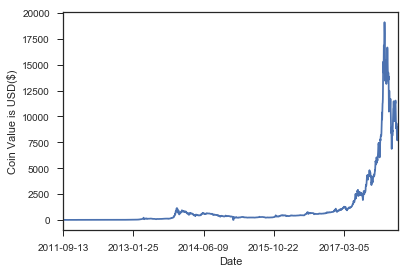

In [8]:
(df['Weighted Price']).plot()
plt.ylabel('Coin Value is USD($)')

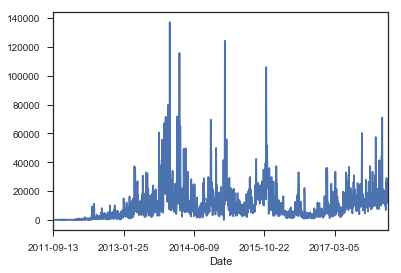

In [9]:
df['Volume (BTC)'];
(df['Volume (BTC)']).plot()


#### Statistical Analysis:
Examining the code through a series of various trends to see if linear/logistic/bayesian modelling is more intuitive and whether or not the data tells us anything statistically 

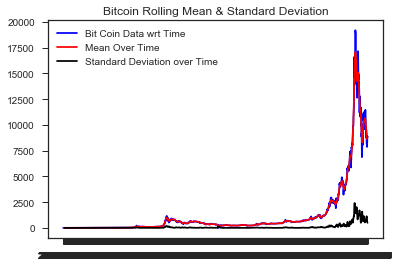

In [90]:
import sys 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=True).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Bit Coin Data wrt Time')
    mean = plt.plot(rolmean, color='red', label='Mean Over Time')
    std = plt.plot(rolstd, color='black', label = 'Standard Deviation over Time')

    plt.title('Bitcoin Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
#     print(dfoutput)
 
test_stationarity(df['Close'])

In [1]:
    rolmean = timeseries.rolling(window=12,center=True).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Bit Coin Data wrt Time')
    mean = plt.plot(rolmean, color='red', label='Mean Over Time')
    std = plt.plot(rolstd, color='black', label = 'Standard Deviation over Time')
    
    plt.show


NameError: name 'timeseries' is not defined

C:\Users\Edward\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


Text(0.5,0,'Time (yr)')

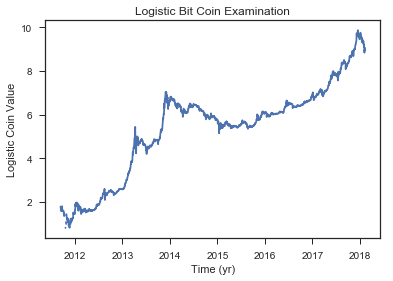

In [157]:
prices=df['Close']
prices= pd.DataFrame({'Close':prices.values,'Date':prices.index,})
prices.columns=['Close', 'Date']
prices['Date'] = pd.to_datetime(prices['Date'])
prices = prices.set_index('Date')
prices
prices_log = np.log(prices)
plt.plot(prices_log)

plt.title('Logistic Bit Coin Examination')
plt.ylabel('Logistic Coin Value')
plt.xlabel('Time (yr)')

In [167]:
#some data is lost here because of inf values
prices_log= prices_log[~prices_log.isin([np.nan, np.inf, -np.inf]).any(1)]

#### Seasonal Examination? Are there any seasonal trends? 

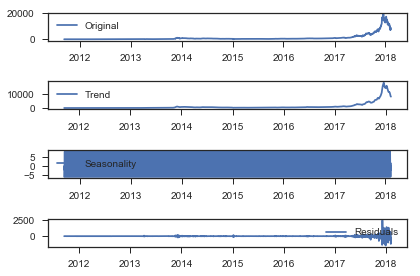

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(prices)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(prices, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


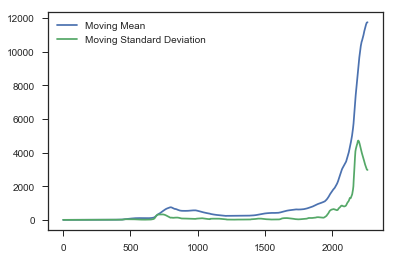

In [107]:
prices=df['Close']

N=120
movmean=[]
movstd=[]
for p in range(N,len(prices)):
    A= np.mean(prices[p-N:p])
    movmean.append(A)
    X=np.std(prices[p-N:p])
    movstd.append(X)
plt.plot(movmean,label = 'Moving Mean')
plt.plot(movstd, label = 'Moving Standard Deviation')
#plt.plot(prices, label ='Price Data')
plt.legend()
plt.show()


In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, xlabel='Coin Price in \$', ylabel='Price GLD in \$')
colors = np.linspace(0.1, 1, len(prices))
mymap = plt.get_cmap("winter")
sc = ax.scatter(prices.GFI, prices.GLD, c=colors, cmap=mymap, lw=0)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p.date()) for p in prices[::len(prices)//10].index])

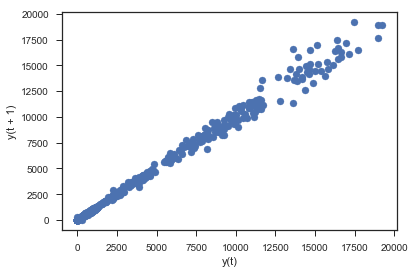

In [95]:
from pandas.plotting import lag_plot
lag_plot(prices)

In [106]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
lr = linear_model.LinearRegression()

predicted = cross_val_predict(lr, , prices, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([prices.min(), prices.max()], [prices.min(), prices.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()



ValueError: could not convert string to float: '2018-03-21'

In [6]:
date_list= [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31)]

NameError: name 'datetime' is not defined